In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('../datasets/gurgaon_properties_missing_value_imputed.csv')

In [3]:
data = pd.read_csv('../latlong.csv')

In [4]:
df = df.merge(right=data, how='inner', on='sector')

In [5]:
df

,sector,property_type,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,builtUpArea,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom,coordinates
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,3.0,3.0,3,0.0,...,1865.0,0,0,0,0,1,0,49,687.026667,"28.4121° N, 77.0480° E"
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,5.0,6.0,3+,2.0,...,2430.0,0,0,1,0,0,0,30,486.000000,"28.5073° N, 77.0089° E"
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,4.0,3.0,3,8.0,...,3111.0,0,0,1,0,0,0,20,700.102500,"28.3663° N, 76.9456° E"
3,sector 7,house,independent,0.66,12000.0,550.00,3.0,1.0,1.0,3.0,...,550.0,1,0,0,0,0,0,22,183.333333,"28.4644° N, 77.0143° E"
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,3.0,3.0,3,5.0,...,1711.0,0,0,0,0,0,2,149,603.710000,"28.4478° N, 76.9703° E"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,sector 84,flat,antriksh heights,0.60,5000.0,1200.00,2.0,2.0,2,14.0,...,1086.0,0,0,0,0,0,0,52,600.000000,"28.3979° N, 76.9736° E"
3085,sector 48,house,vipul tatvam villa,8.50,26235.0,3239.90,4.0,6.0,3.0,3.0,...,3240.0,1,1,1,0,0,0,49,809.975000,"28.4177° N, 77.0359° E"
3086,sector 79,flat,bestech altura,1.85,8604.0,2150.16,3.0,3.0,3,7.0,...,1650.0,0,0,1,0,0,0,53,716.720000,"28.3624° N, 76.9787° E"
3087,sector 103,flat,satya the hermitage,0.93,6404.0,1452.22,2.0,3.0,3,3.0,...,1613.0,0,0,1,0,0,2,90,726.110000,"28.4949° N, 76.9845° E"


In [57]:
import re
pattern = re.compile(r"\d+\.\d+") 

In [69]:
df['latitude'] = df['coordinates'].apply(lambda x: re.match(pattern, x.split(",")[0]).group()).astype('float')
df['longitude'] = df['coordinates'].apply(lambda x: re.match(pattern, x.split(",")[1].strip()).group()).astype('float')

In [71]:
df

,sector,property_type,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom,coordinates,latitude,longitude
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,3.0,3.0,3,0.0,...,0,0,0,1,0,49,687.026667,"28.4121° N, 77.0480° E",28.4121,77.0480
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,5.0,6.0,3+,2.0,...,0,1,0,0,0,30,486.000000,"28.5073° N, 77.0089° E",28.5073,77.0089
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,4.0,3.0,3,8.0,...,0,1,0,0,0,20,700.102500,"28.3663° N, 76.9456° E",28.3663,76.9456
3,sector 7,house,independent,0.66,12000.0,550.00,3.0,1.0,1.0,3.0,...,0,0,0,0,0,22,183.333333,"28.4644° N, 77.0143° E",28.4644,77.0143
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,3.0,3.0,3,5.0,...,0,0,0,0,2,149,603.710000,"28.4478° N, 76.9703° E",28.4478,76.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,sector 84,flat,antriksh heights,0.60,5000.0,1200.00,2.0,2.0,2,14.0,...,0,0,0,0,0,52,600.000000,"28.3979° N, 76.9736° E",28.3979,76.9736
3085,sector 48,house,vipul tatvam villa,8.50,26235.0,3239.90,4.0,6.0,3.0,3.0,...,1,1,0,0,0,49,809.975000,"28.4177° N, 77.0359° E",28.4177,77.0359
3086,sector 79,flat,bestech altura,1.85,8604.0,2150.16,3.0,3.0,3,7.0,...,0,1,0,0,0,53,716.720000,"28.3624° N, 76.9787° E",28.3624,76.9787
3087,sector 103,flat,satya the hermitage,0.93,6404.0,1452.22,2.0,3.0,3,3.0,...,0,1,0,0,2,90,726.110000,"28.4949° N, 76.9845° E",28.4949,76.9845


In [93]:
group_df = df.groupby('sector')[['price', 'price_per_sqft', 'builtUpArea', 'latitude', 'longitude']].mean()
group_df

,price,price_per_sqft,builtUpArea,latitude,longitude
sector,,,,,
gwal pahari,3.822857,10331.142857,3539.642857,28.4484,77.0210
manesar,0.964286,5488.857143,2030.428571,28.3515,76.9428
sector 1,0.916111,4280.944444,1908.444444,28.3663,76.9456
sector 102,1.696636,10603.719626,1555.971963,28.4750,76.9715
sector 103,1.495000,7445.476190,1865.404762,28.4949,76.9845
...,...,...,...,...,...
sector 92,0.934848,5939.595960,1570.959596,28.4079,76.9153
sector 93,0.848889,8010.555556,1016.666667,28.4153,76.9326
sector 95,0.484630,5594.037037,1006.888889,28.4172,76.9081


In [119]:
fig = px.scatter_mapbox(group_df, lat='latitude', lon='longitude', color='price_per_sqft', size='builtUpArea', 
                color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                mapbox_style="open-street-map", text=group_df.index, height=600)

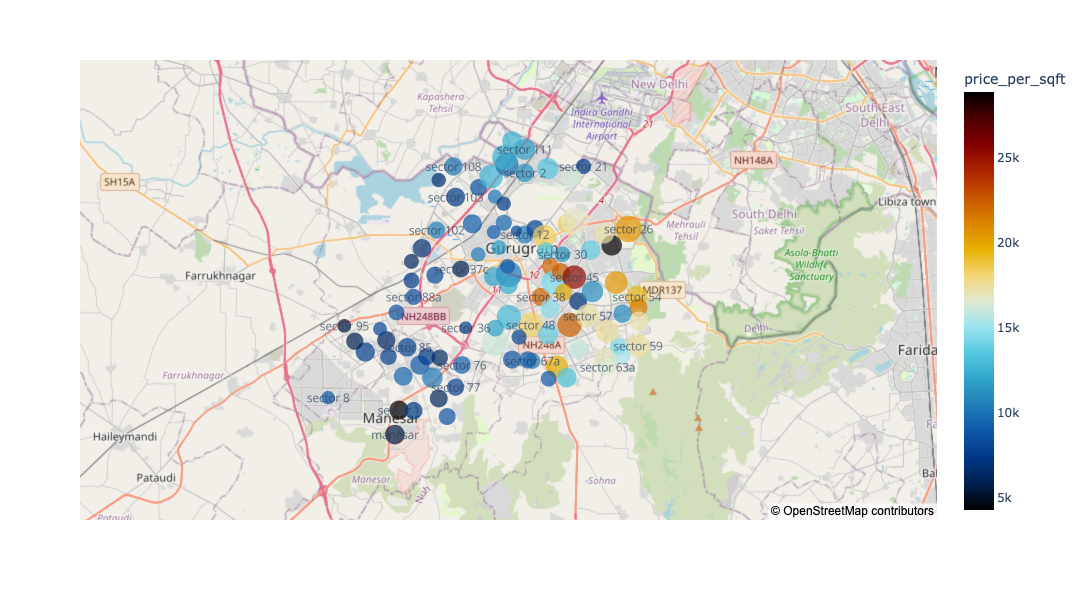

In [121]:
fig.show()

In [123]:
group_df.to_csv("../datasets/group_df.csv", index=False)

In [131]:
df1 = pd.read_csv("../datasets/gurgaon_properties.csv")

In [137]:
df1

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 49 Gurgaon,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3,3,3,study room,"Sector 49 Gurgaon, Gurgaon, Haryana",0.0,North-East,1 to 5 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBaz...","Situated in sector 49 gurgaon, orchid petals i...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
1,5 Bedroom House for sale in Sector 109 Gurgaon,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5,6,3+,Servant Room,"Sector 109 Gurgaon, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...",There is servant room plus servant toilet behi...,NaN,"['Maintenance Staff', 'Separate entry for serv...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
2,4 BHK Flat in Sector 1 Imt Manesar,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4,3,3,servant room,"Sector 1 Imt Manesar, Gurgaon, Haryana",8.0,NaN,0 to 1 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",This 4 bhk flat is located in sonata group hou...,NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag...","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,3 Bedroom House for sale in Krishna Colony,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3,1,1.0,Others,"Krishna Colony, Gurgaon, Haryana",3.0,East,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...","Peaceful area, middle of market, 24 hrs connec...",[],"['Water Storage', 'Park', 'Visitor Parking']","['Environment4 out of 5', 'Lifestyle4 out of 5..."
4,3 BHK Flat in Sector 37D Gurgaon,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,not available,"501, Sector 37D Gurgaon, Gurgaon, Haryana",5.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...","This 3 bhk flat is located in bptp terra, whic...","['6 Fan', '5 AC', '1 Chimney', '1 Modular Kitc...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area4.5 out of 5', 'Construction4.5 ou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,4 Bedroom House for sale in Surat Nagar,house,independent,0.71,10142.0,700.10,Plot area 700(65.03 sq.m.),4,2,1.0,not available,"Surat Nagar, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Dr. ...",Interested to sell independent house/villa.It ...,NaN,NaN,"['Environment3 out of 5', 'Lifestyle3 out of 5..."
3990,3 BHK Flat in Sai Kunj,flat,laxmi apartment,0.55,6470.0,850.08,Carpet area: 850 (78.97 sq.m.),3,2,1,not available,"Sai Kunj, Gurgaon, Haryana",3.0,North,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",Flat for sale in sai kunj new palam vihar gurg...,"['1 Fan', '1 Light', '1 Wardrobe', 'No AC', 'N...",NaN,NaN
3991,3 BHK Flat in Sector 79 Gurgaon,flat,bestech altura,1.85,8604.0,2150.16,Super Built up area 2150(199.74 sq.m.)Built Up...,3,3,3,servant room,"Sector 79 Gurgaon, Gurgaon, Haryana",7.0,NaN,Within 3 months,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Ext...","Premium north and park facing, middle floor,wi...","['4 AC', '1 Modular Kitchen', 'No Bed', 'No Ch...","['Intercom Facility', 'Lift(s)', 'Maintenance ...","['Environment4 out of 5', 'Lifestyle3 out of 5..."
3992,2 BHK Flat in Sector 103 Gurgaon,flat,satya the hermitage,0.93,6404.0,1452.22,Carpet area: 1452 (134.9 sq.m.),2,3,3,servant room,"Sector 103 Gurgaon, Gurgaon, Haryana",3.0,East,1 to 5 Year Old,"['Metro Hospital, Palam Vihar', 'Huda Metro St...",Corner flat well furnished flat with full vent...,"['6 Fan', '1 Exhaust Fan', '1 Chimney', '4 Cur...","['Security / Fire Alarm', 'Intercom Facility',...","['Green Area5 out

In [139]:
df

,sector,property_type,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom,coordinates,latitude,longitude
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,3.0,3.0,3,0.0,...,0,0,0,1,0,49,687.026667,"28.4121° N, 77.0480° E",28.4121,77.0480
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,5.0,6.0,3+,2.0,...,0,1,0,0,0,30,486.000000,"28.5073° N, 77.0089° E",28.5073,77.0089
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,4.0,3.0,3,8.0,...,0,1,0,0,0,20,700.102500,"28.3663° N, 76.9456° E",28.3663,76.9456
3,sector 7,house,independent,0.66,12000.0,550.00,3.0,1.0,1.0,3.0,...,0,0,0,0,0,22,183.333333,"28.4644° N, 77.0143° E",28.4644,77.0143
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,3.0,3.0,3,5.0,...,0,0,0,0,2,149,603.710000,"28.4478° N, 76.9703° E",28.4478,76.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,sector 84,flat,antriksh heights,0.60,5000.0,1200.00,2.0,2.0,2,14.0,...,0,0,0,0,0,52,600.000000,"28.3979° N, 76.9736° E",28.3979,76.9736
3085,sector 48,house,vipul tatvam villa,8.50,26235.0,3239.90,4.0,6.0,3.0,3.0,...,1,1,0,0,0,49,809.975000,"28.4177° N, 77.0359° E",28.4177,77.0359
3086,sector 79,flat,bestech altura,1.85,8604.0,2150.16,3.0,3.0,3,7.0,...,0,1,0,0,0,53,716.720000,"28.3624° N, 76.9787° E",28.3624,76.9787
3087,sector 103,flat,satya the hermitage,0.93,6404.0,1452.22,2.0,3.0,3,3.0,...,0,1,0,0,2,90,726.110000,"28.4949° N, 76.9845° E",28.4949,76.9845


In [433]:
word_cloud_df = df1.merge(df, left_index=True, right_index=True, how='inner')[['sector', 'features']]

In [435]:
word_cloud_df.groupby('sector')[['features']]

In [437]:
word_cloud_df.dropna(inplace=True)

In [439]:
word_cloud_df.to_csv("../datasets/word_cloud_df.csv", index=False)

In [463]:
import ast

In [511]:
li = []
for i in word_cloud_df['features'].dropna().apply(ast.literal_eval):
    print(i)
    li.extend(i)
    break

['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']


In [513]:
li

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking']

In [451]:
feature_text = []

for i in word_cloud_df[word_cloud_df['sector'] == 'sector 12']['features'].values:
    feature_text += map(lambda x: x.replace("\'", ""), i.replace("[", "",).replace("]", "").split(","))


In [393]:
from wordcloud import WordCloud

In [397]:
feature_text

'Feng Shui / Vaastu Compliant  Security / Fire Alarm  Intercom Facility  Lift(s)  Maintenance Staff  Water Storage  Park  Visitor Parking Feng Shui / Vaastu Compliant  Private Garden / Terrace  High Ceiling Height  Maintenance Staff  False Ceiling Lighting  Water Storage  Separate entry for servant room  No open drainage around  Bank Attached Property  Piped-gas  Visitor Parking  Swimming Pool  Park  Security Personnel  Internet/wi-fi connectivity  Low Density Society  Fitness Centre / GYM  Waste Disposal  Rain Water Harvesting  Club house / Community Center Centrally Air Conditioned  Security / Fire Alarm  Power Back-up  Feng Shui / Vaastu Compliant  Intercom Facility  Lift(s)  High Ceiling Height  Maintenance Staff  False Ceiling Lighting  Water Storage  Separate entry for servant room  No open drainage around  Piped-gas  Internet/wi-fi connectivity  Recently Renovated  Visitor Parking  Swimming Pool  Park  Security Personnel  Natural Light  Airy Rooms  Spacious Interiors  Low Densit

In [409]:
with open("../datasets/feature_text.txt", 'w') as file:
    file.write(feature_text)

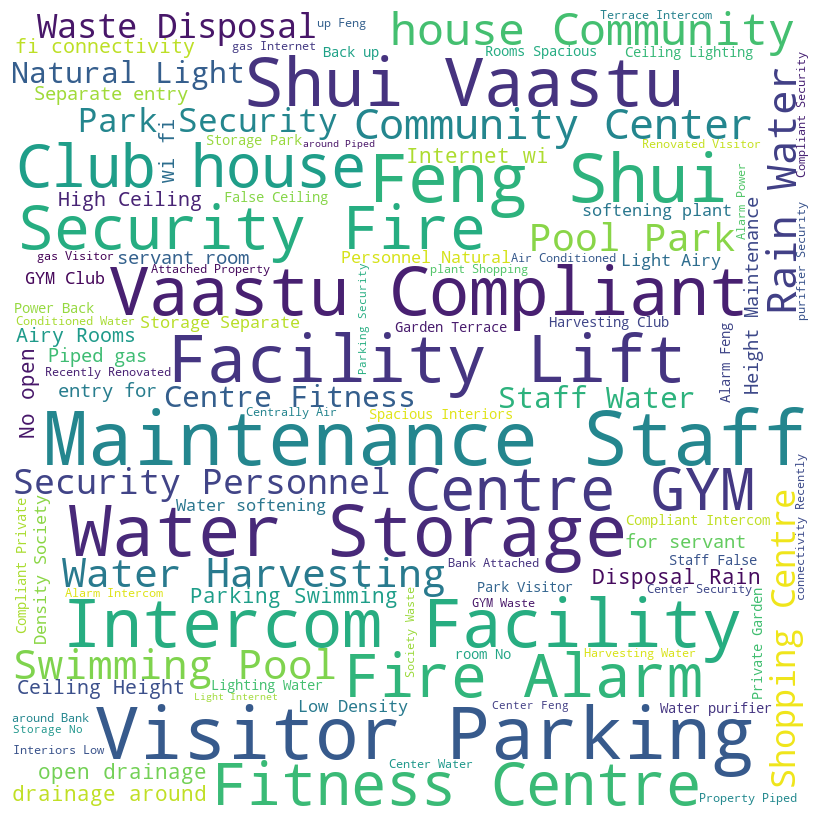

In [405]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,background_color='white',stopwords=set(['s']),min_font_size = 10).generate(feature_text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')                    
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [411]:
with open("feature_text.txt", 'r') as f:
    s = f.read()

In [413]:
s

'Feng Shui / Vaastu Compliant  Security / Fire Alarm  Intercom Facility  Lift(s)  Maintenance Staff  Water Storage  Park  Visitor Parking Feng Shui / Vaastu Compliant  Private Garden / Terrace  High Ceiling Height  Maintenance Staff  False Ceiling Lighting  Water Storage  Separate entry for servant room  No open drainage around  Bank Attached Property  Piped-gas  Visitor Parking  Swimming Pool  Park  Security Personnel  Internet/wi-fi connectivity  Low Density Society  Fitness Centre / GYM  Waste Disposal  Rain Water Harvesting  Club house / Community Center Centrally Air Conditioned  Security / Fire Alarm  Power Back-up  Feng Shui / Vaastu Compliant  Intercom Facility  Lift(s)  High Ceiling Height  Maintenance Staff  False Ceiling Lighting  Water Storage  Separate entry for servant room  No open drainage around  Piped-gas  Internet/wi-fi connectivity  Recently Renovated  Visitor Parking  Swimming Pool  Park  Security Personnel  Natural Light  Airy Rooms  Spacious Interiors  Low Densit

In [515]:
df

,sector,property_type,society,price,price_per_sqft,area,bedRoom,bathroom,balcony,floorNum,...,pooja room,servant room,store room,study room,furnishing_type,luxury_score,area_to_bedroom,coordinates,latitude,longitude
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,3.0,3.0,3,0.0,...,0,0,0,1,0,49,687.026667,"28.4121° N, 77.0480° E",28.4121,77.0480
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,5.0,6.0,3+,2.0,...,0,1,0,0,0,30,486.000000,"28.5073° N, 77.0089° E",28.5073,77.0089
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,4.0,3.0,3,8.0,...,0,1,0,0,0,20,700.102500,"28.3663° N, 76.9456° E",28.3663,76.9456
3,sector 7,house,independent,0.66,12000.0,550.00,3.0,1.0,1.0,3.0,...,0,0,0,0,0,22,183.333333,"28.4644° N, 77.0143° E",28.4644,77.0143
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,3.0,3.0,3,5.0,...,0,0,0,0,2,149,603.710000,"28.4478° N, 76.9703° E",28.4478,76.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,sector 84,flat,antriksh heights,0.60,5000.0,1200.00,2.0,2.0,2,14.0,...,0,0,0,0,0,52,600.000000,"28.3979° N, 76.9736° E",28.3979,76.9736
3085,sector 48,house,vipul tatvam villa,8.50,26235.0,3239.90,4.0,6.0,3.0,3.0,...,1,1,0,0,0,49,809.975000,"28.4177° N, 77.0359° E",28.4177,77.0359
3086,sector 79,flat,bestech altura,1.85,8604.0,2150.16,3.0,3.0,3,7.0,...,0,1,0,0,0,53,716.720000,"28.3624° N, 76.9787° E",28.3624,76.9787
3087,sector 103,flat,satya the hermitage,0.93,6404.0,1452.22,2.0,3.0,3,3.0,...,0,1,0,0,2,90,726.110000,"28.4949° N, 76.9845° E",28.4949,76.9845


In [639]:
df = pd.read_csv('../datasets/gurgaon_properties_missing_value_imputed.csv')

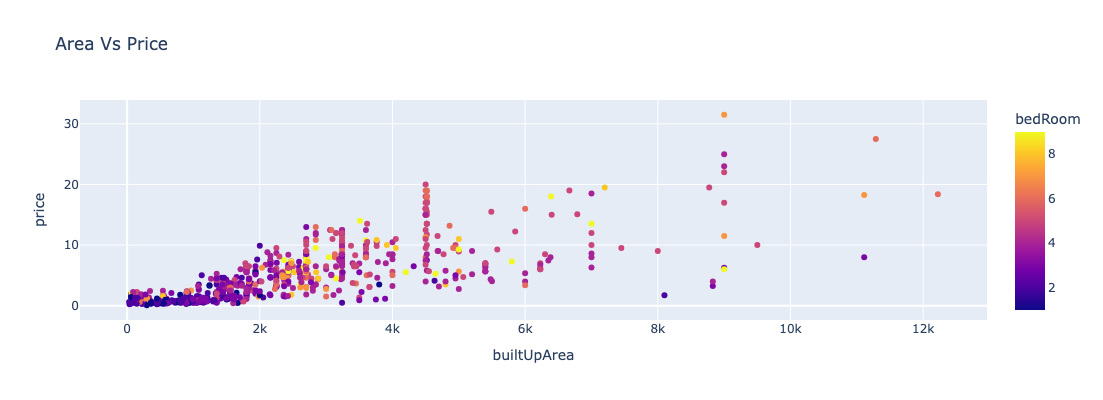

In [567]:
property_type = 'house'

viz_df = df[df['property_type'] == property_type]

fig = px.scatter(viz_df, x="builtUpArea", y='price', color='bedRoom', title="Area Vs Price", height=400)

fig.show()

In [641]:
df['bedRoom']

0       3.0
1       5.0
2       4.0
3       3.0
4       3.0
       ... 
3561    2.0
3562    2.0
3563    3.0
3564    2.0
3565    3.0
Name: bedRoom, Length: 3566, dtype: float64

In [712]:
sector = df['sector'].unique().tolist()[0]
sector

'sector 49'

In [772]:
df[df['sector'] == 'sector 12']['bedRoom'].value_counts().reset_index()

,bedRoom,count
0,3.0,12
1,2.0,9
2,1.0,3
3,5.0,3
4,4.0,3
5,8.0,1
6,6.0,1
7,9.0,1
8,7.0,1


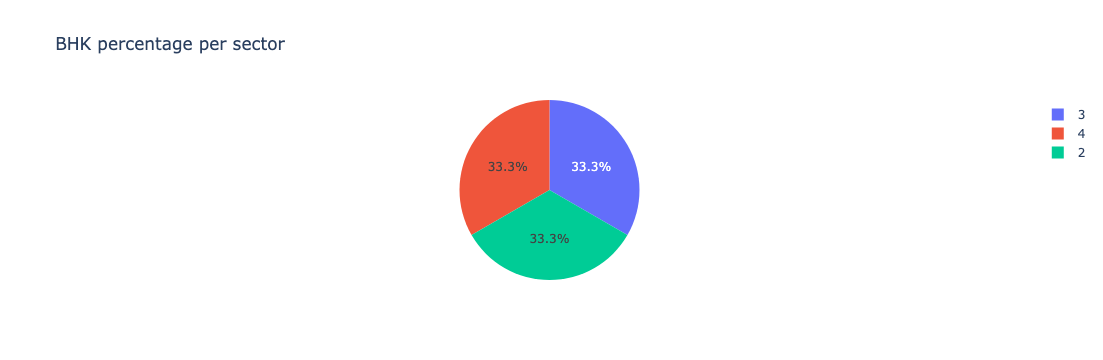

In [786]:
pie_df = df[df['sector'] == 'sector 1']['bedRoom'].value_counts().reset_index()
fig = px.pie(pie_df, names='bedRoom', title='BHK percentage per sector', )
fig.show()

In [788]:
pie_df = df['bedRoom'].value_counts().reset_index()

In [804]:
pie_df['bedRoom']

0    3.0
1    2.0
2    4.0
3    5.0
4    1.0
5    6.0
6    9.0
7    7.0
8    8.0
Name: bedRoom, dtype: float64

<Axes: ylabel='count'>

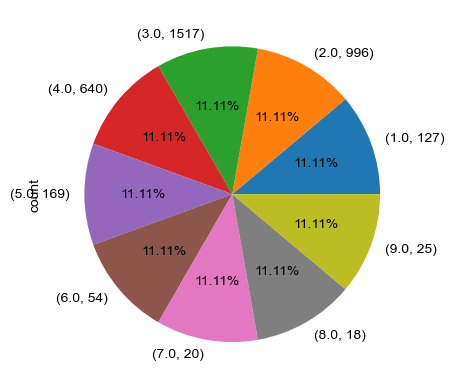

In [798]:
pie_df.value_counts().plot(kind='pie', autopct='%0.02f%%')

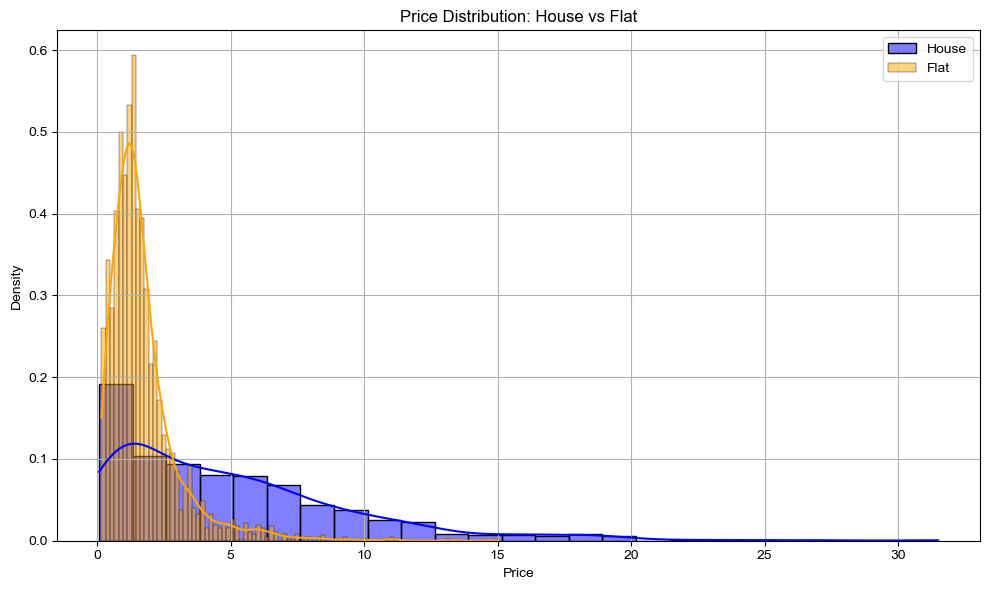

In [818]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# House price distribution
sns.histplot(data=df[df['property_type'] == 'house'], x='price', color='blue', label='House', kde=True, stat='density', alpha=0.5)

# Flat price distribution
sns.histplot(data=df[df['property_type'] == 'flat'], x='price', color='orange', label='Flat', kde=True, stat='density', alpha=0.5)

plt.title('Price Distribution: House vs Flat')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()